<a href="https://colab.research.google.com/github/manojBhorge07/Deelip-bhorge-paints/blob/main/emotion_detection_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emotion Detection from Text (Multi-Class)

This notebook tackles the problem of multi-class emotion classification from text data. It automatically loads a suitable dataset: if a user-provided CSV at `/content/emotions.csv` exists, it uses that; otherwise it tries to download the `dair-ai/emotion` dataset from Hugging Face, or falls back to a filtered single-label version of the `go_emotions` dataset. The workflow includes clean stratified splits, baseline and advanced models, metrics reporting, interpretability, error analysis, ablation, optional Transformer fine‑tuning, artifact saving and a final report.

**Deliverables**:

- Clean train / validation / test splits (stratified)
- Baseline (TF‑IDF + Logistic Regression) → Final (TF‑IDF + LinearSVC)
- Metrics: Accuracy, Macro‑F1, per‑class F1
- Confusion Matrix (with values overlaid)
- Interpretability: top n‑grams per class (from LogReg)
- Error analysis (misclassifications with brief notes)
- Ablation: n‑gram/feature size variants and impact on Macro‑F1
- Optional DistilBERT fine‑tuning (collapsible)
- Saved artifacts: pipeline `.joblib`, label encoder `.joblib`, predictions CSV, confusion matrix PNG
- Final mini‑report


In [1]:
pip install fsspec==2025.3.0

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install requests==2.32.4


Defaulting to user installation because normal site-packages is not writeable
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas==2.2.2


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.5 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.5 MB 2.9 MB/s eta 0:00:04
   ------- -------------------------------- 2.1/11.5 MB 3.0 MB/s eta 0:00:04
   ---------- ----------------------------- 2.9/11.5 MB 3.2 MB/s eta 0:00:03
   -------------- ------------------------- 4.2/11.5 MB 3.7 MB/s eta 0:00:02
   ------------------ --------------------- 5.2/11.5 MB 4.0 MB/s eta 0:00:02
   ------------------------ --------------- 7.1/11.5 MB 4.6 MB/s eta 0:00:01
   ------------------------------- -------- 9.2/11.5 MB 5.1 MB/s eta 0:00:01
   ------------------------------------- -- 10.7/11.5 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 5.5 MB/s  0:00:02
  Attempting 

In [4]:
pip install numpy==1.26.4


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
    --------------------------------------- 0.3/15.5 MB ? eta -:--:--
   -- ------------------------------------- 0.8/15.5 MB 2.8 MB/s eta 0:00:06
   --- ------------------------------------ 1.3/15.5 MB 2.7 MB/s eta 0:00:06
   ------ --------------------------------- 2.4/15.5 MB 3.2 MB/s eta 0:00:05
   -------- ------------------------------- 3.1/15.5 MB 3.4 MB/s eta 0:00:04
   ---------- ----------------------------- 4.2/15.5 MB 3.6 MB/s eta 0:00:04
   -------------- ------------------------- 5.5/15.5 MB 4.0 MB/s eta 0:00:03
   ----------------- ---------------------- 6.8/15.5 MB 4.4 MB/s eta 0:00:02
   ---------------------- ----------------- 8.7/15.5 MB 4.9 MB/s eta 0:00:02
   --------------------------- ------------ 10.5/15.5 MB 5.4 MB/s eta 0:00:01
   -------------------------------- ------- 12.6/15.5 MB 5.8 MB/s eta 0:00:01
   -------

In [5]:
pip install scikit-learn==1.5.2


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.0 MB 4.2 MB/s eta 0:00:03
   --------- ------------------------------ 2.6/11.0 MB 6.0 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/11.0 MB 6.9 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.0 MB 7.2 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.0 MB 7.4 MB/s eta 0:00:01
   ------------------------------------ --- 10.0/11.0 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 7.9 MB/s  0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib==3.9.2


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 2.1 MB/s eta 0:00:04
   ----- ---------------------------------- 1.0/7.8 MB 2.3 MB/s eta 0:00:03
   --------- ------------------------------ 1.8/7.8 MB 2.7 MB/s eta 0:00:03
   ------------- -------------------------- 2.6/7.8 MB 3.0 MB/s eta 0:00:02
   ----------------- ---------------------- 3.4/7.8 MB 3.3 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/7.8 MB 3.5 MB/s eta 0:00:01
   ----------------------------- ---------- 5.8/7.8 MB 3.9 MB/s eta 0:00:01
   ------------------------------------- -- 7.3/7.8 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 4.5 MB/s  0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.3
    Uninstalling 

In [7]:
pip install imbalanced-learn==0.12.3


Defaulting to user installation because normal site-packages is not writeable
  Using cached imbalanced_learn-0.12.3-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install datasets==3.0.1


Defaulting to user installation because normal site-packages is not writeable
  Using cached datasets-3.0.1-py3-none-any.whl.metadata (20 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached hf_xet-1.2.0-cp37-abi3-win_amd64.whl.metadata (5.0 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached typer_slim-0.20.0-py3-none-any.whl.metadata (16 kB)
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
Using cached datasets-3.0.1-py3-none-any.whl (471 kB)
Using cached dill-0.3.8-py3-none-any.whl (116 kB)
Using cached hf_xet-1.2.0-cp37-abi3-win_amd64.whl (2.9 MB)
   ---------------------------------------- 0.0/28.0 MB ? eta -:--:--
   - -------------------------------------- 1.0/28.0 MB 5.6 MB/s eta 0:00:05
   --- ------------------------------------ 2.4/28.0 MB 5.8 MB/s eta 0:00:05
   --- ------------------------------------ 2.6/28.0 

In [9]:
pip install joblib==1.4.2


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install pyarrow==17.0.0


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/25.1 MB ? eta -:--:--
   - -------------------------------------- 0.8/25.1 MB 1.9 MB/s eta 0:00:14
   - -------------------------------------- 1.0/25.1 MB 1.7 MB/s eta 0:00:14
   -- ------------------------------------- 1.6/25.1 MB 2.0 MB/s eta 0:00:12
   --- ------------------------------------ 2.1/25.1 MB 2.1 MB/s eta 0:00:11
   ---- ----------------------------------- 2.6/25.1 MB 2.2 MB/s eta 0:00:11
   ----- ---------------------------------- 3.4/25.1 MB 2.4 MB/s eta 0:00:09
   ------ --------------------------------- 4.2/25.1 MB 2.6 MB/s eta 0:00:09
   ------- -------------------------------- 5.0/25.1 MB 2.8 MB/s eta 0:00:08
   --------- ------------------------------ 6.0/25.1 MB 3.0 MB/s eta 0:00:07
   ---------- -----

In [11]:
pip install fsspec==2024.6.1


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install "huggingface-hub<1.0,>=0.34.0"


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/566.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/566.1 kB ? eta -:--:--
   ------------------ --------------------- 262.1/566.1 kB ? eta -:--:--
   ---------------------------------------- 566.1/566.1 kB 1.8 MB/s  0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface_hub 1.1.2
    Uninstalling huggingface_hub-1.1.2:
      Successfully uninstalled huggingface_hub-1.1.2
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install "pillow<12.0"


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas, numpy, sklearn, datasets, joblib, matplotlib
print("✅ All libraries imported successfully!")
print("Versions:")
print("pandas:", pandas.__version__)
print("numpy:", numpy.__version__)
print("scikit-learn:", sklearn.__version__)



✅ All libraries imported successfully!
Versions:
pandas: 2.2.2
numpy: 1.26.4
scikit-learn: 1.5.2


In [15]:
# Imports and global configuration
import os, sys, gc, warnings, random, json, itertools, typing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datasets import load_dataset

from sklearn import model_selection, metrics, feature_extraction, linear_model, svm, pipeline, preprocessing
from sklearn.preprocessing import LabelEncoder

import joblib

# Suppress warnings and configure display
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 10)

# Set global seeds for reproducibility
def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    # sklearn models accept random_state parameter directly

set_seed(42)


README.md: 0.00B [00:00, ?B/s]

split/train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

split/validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

split/test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset source: dair-ai/emotion
Dataset shape: (20000, 2)
                                                                                                                         text  \
0                                                                                                     i didnt feel humiliated   
1                i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake   
2                                                                            im grabbing a minute to post i feel greedy wrong   
3                                i am ever feeling nostalgic about the fireplace i will know that it is still on the property   
4                                                                                                        i am feeling grouchy   
5                                                           ive been feeling a little burdened lately wasnt sure why that was   
6  ive been taking or milligrams or tim

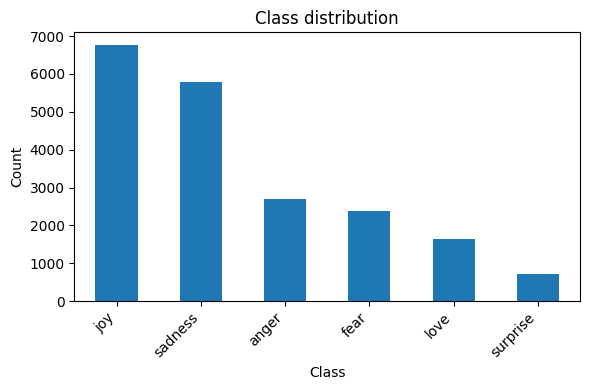

In [16]:
# Data ingestion
DATA_PATH = "/content/emotions.csv"

def load_user_csv_or_hf():
    """Load user-provided CSV or fetch a suitable dataset from Hugging Face.

    Returns
    -------
    df : pandas.DataFrame
        DataFrame with columns 'text' and 'label'.
    source : str
        Description of the data source.
    class_counts : pandas.Series
        Counts of each label.
    class_percent : pandas.Series
        Percentage of each label.
    """
    import os
    # If user provided a CSV, use it
    if os.path.exists(DATA_PATH):
        df = pd.read_csv(DATA_PATH)
        if 'text' not in df.columns or 'label' not in df.columns:
            raise ValueError(f"CSV at {DATA_PATH} must contain 'text' and 'label' columns.")
        df = df[['text', 'label']]
        source = 'user CSV'
    else:
        df = None
        source = None
        # Attempt to load dair-ai/emotion
        try:
            dataset = load_dataset("dair-ai/emotion")
            # Convert splits to pandas DataFrame
            train_df = dataset['train'].to_pandas()
            val_df = dataset['validation'].to_pandas()
            test_df = dataset['test'].to_pandas()
            df = pd.concat([train_df, val_df, test_df], ignore_index=True)
            # Map integer labels to names
            label_names = dataset['train'].features['label'].names
            df['label'] = df['label'].apply(lambda x: label_names[x])
            df = df[['text', 'label']]
            source = 'dair-ai/emotion'
        except Exception as e1:
            # Attempt to load go_emotions and convert to single-label
            try:
                dataset = load_dataset("go_emotions")
                label_names = dataset['train'].features['labels'].feature.names

                def convert_row(example):
                    labels = example['labels']
                    if not labels:
                        return None
                    # choose the first label deterministically
                    lbl = labels[0]
                    return {'text': example['text'], 'label': label_names[lbl]}

                rows = []
                for split in ['train', 'validation', 'test']:
                    for ex in dataset[split]:
                        conv = convert_row(ex)
                        if conv is not None:
                            rows.append(conv)
                df = pd.DataFrame(rows)
                source = 'go_emotions (single-label)'
            except Exception as e2:
                raise RuntimeError("No suitable dataset could be loaded. Please ensure internet connectivity or provide a CSV at /content/emotions.csv.") from e2
    # Basic cleanup
    df['text'] = df['text'].astype(str).str.strip()
    df['label'] = df['label'].astype(str).str.strip()
    df = df.dropna(subset=['text', 'label']).reset_index(drop=True)
    # Compute class distribution
    class_counts = df['label'].value_counts()
    class_percent = (class_counts / len(df) * 100).round(2)
    # Show summary
    print(f"Dataset source: {source}")
    print(f"Dataset shape: {df.shape}")
    print(df.head(10))
    print("\nClass distribution:")
    for lab, cnt in class_counts.items():
        print(f"{lab}: {cnt} ({class_percent[lab]}%)")
    # Plot distribution
    plt.figure(figsize=(6,4))
    class_counts.plot(kind='bar')
    plt.title("Class distribution")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    # Validation warnings
    if class_counts.size < 3:
        print("Warning: fewer than 3 unique classes.")
    if source and source.startswith('dair') and len(df) < 1000:
        print("Warning: HF dataset has fewer than 1000 rows.")
    if source == 'user CSV' and len(df) < 200:
        print("Warning: user dataset has fewer than 200 rows.")
    return df, source, class_counts, class_percent

# Load the data
df, dataset_source, class_counts, class_percent = load_user_csv_or_hf()

count    20000.000000
mean        96.670050
std         55.777923
min          7.000000
25%         53.000000
50%         86.000000
75%        129.000000
max        300.000000
Name: len, dtype: float64
Removed 0 short texts with ≤3 characters.


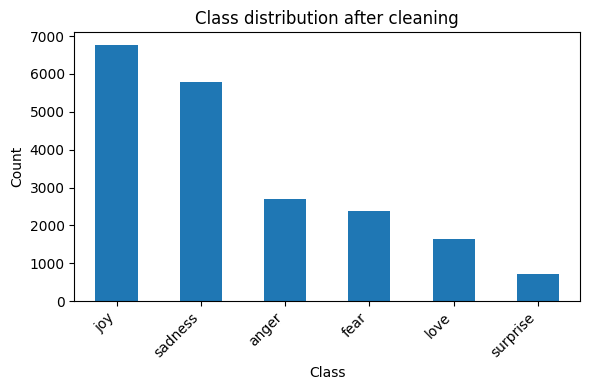

In [17]:
# Light cleaning and EDA
# Add length column
df['len'] = df['text'].apply(len)
print(df['len'].describe())
# Remove very short texts
initial_len = len(df)
df = df[df['len'] > 3].reset_index(drop=True)
removed = initial_len - len(df)
print(f"Removed {removed} short texts with ≤3 characters.")
# Replot class distribution after cleaning
class_counts = df['label'].value_counts()
class_percent = (class_counts / len(df) * 100).round(2)
plt.figure(figsize=(6,4))
class_counts.plot(kind='bar')
plt.title("Class distribution after cleaning")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [18]:
# Label encoding and stratified split
encoder = LabelEncoder()
y = encoder.fit_transform(df['label'])
classes = encoder.classes_.tolist()
X = df['text'].astype(str).values

# Function to perform stratified split
def stratified_split(X, y, test_size=0.15, val_size=0.15, seed=42):
    # First split off test set
    X_temp, X_test, y_temp, y_test = model_selection.train_test_split(
        X, y, test_size=test_size, random_state=seed, stratify=y
    )
    # Determine validation fraction relative to remaining data
    val_fraction_of_temp = val_size / (1.0 - test_size)
    X_train, X_val, y_train, y_val = model_selection.train_test_split(
        X_temp, y_temp, test_size=val_fraction_of_temp, random_state=seed, stratify=y_temp
    )
    return X_train, X_val, X_test, y_train, y_val, y_test

# Attempt splits with multiple seeds to ensure all classes appear in each split
def perform_split(X, y, seeds=[42, 43, 44]):
    for seed in seeds:
        X_train, X_val, X_test, y_train, y_val, y_test = stratified_split(X, y, seed=seed)
        if set(y_train) == set(y) and set(y_val) == set(y) and set(y_test) == set(y):
            print(f"Split with seed {seed} contains all classes.")
            return X_train, X_val, X_test, y_train, y_val, y_test
        else:
            print(f"Split with seed {seed} missing some classes; trying next seed.")
    # Fallback: use the last split even if some classes are missing
    print("Proceeding with the last split despite missing classes.")
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = perform_split(X, y)
print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")
print(f"Classes: {classes}")


Split with seed 42 contains all classes.
Train size: 14000, Validation size: 3000, Test size: 3000
Classes: ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']


In [19]:
# Baseline model: TF-IDF + Logistic Regression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Baseline pipeline
baseline_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=40000, min_df=2)),
    ('clf', LogisticRegression(max_iter=300, n_jobs=-1, class_weight=None, random_state=42))
])

# Fit and evaluate on validation set
baseline_pipeline.fit(X_train, y_train)
y_val_pred = baseline_pipeline.predict(X_val)
acc_baseline = metrics.accuracy_score(y_val, y_val_pred)
macro_f1_baseline = metrics.f1_score(y_val, y_val_pred, average='macro')
print(f"Baseline Validation Accuracy: {acc_baseline:.4f}")
print(f"Baseline Validation Macro-F1: {macro_f1_baseline:.4f}")
print(f"Baseline classification report:")
print(metrics.classification_report(y_val, y_val_pred, target_names=classes))

# Check for class imbalance and refit if necessary
train_class_proportions = pd.Series(y_train).value_counts(normalize=True)
if (train_class_proportions < 0.08).any():
    balanced_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=40000, min_df=2)),
        ('clf', LogisticRegression(max_iter=300, n_jobs=-1, class_weight='balanced', random_state=42))
    ])
    balanced_pipeline.fit(X_train, y_train)
    y_val_pred_balanced = balanced_pipeline.predict(X_val)
    acc_balanced = metrics.accuracy_score(y_val, y_val_pred_balanced)
    macro_f1_balanced = metrics.f1_score(y_val, y_val_pred_balanced, average='macro')
    print(f"""
Balanced Validation Accuracy: {acc_balanced:.4f}
Balanced Validation Macro-F1: {macro_f1_balanced:.4f}
Balanced classification report:
{metrics.classification_report(y_val, y_val_pred_balanced, target_names=classes)}
""")
    # Choose the better baseline
    if macro_f1_balanced > macro_f1_baseline:
        baseline_pipeline = balanced_pipeline
        acc_baseline = acc_balanced
        macro_f1_baseline = macro_f1_balanced
        print("\nUsing balanced baseline for further comparison.")


Baseline Validation Accuracy: 0.8053
Baseline Validation Macro-F1: 0.6996
Baseline classification report:
              precision    recall  f1-score   support

       anger       0.89      0.70      0.78       406
        fear       0.83      0.66      0.73       356
         joy       0.75      0.96      0.84      1014
        love       0.86      0.43      0.57       246
     sadness       0.83      0.91      0.87       870
    surprise       0.93      0.25      0.39       108

    accuracy                           0.81      3000
   macro avg       0.85      0.65      0.70      3000
weighted avg       0.82      0.81      0.79      3000


Balanced Validation Accuracy: 0.8613
Balanced Validation Macro-F1: 0.8353
Balanced classification report:
              precision    recall  f1-score   support

       anger       0.84      0.86      0.85       406
        fear       0.80      0.80      0.80       356
         joy       0.90      0.88      0.89      1014
        love       0.74    

In [20]:
# Final classical model: TF-IDF + LinearSVC
from sklearn.svm import LinearSVC

svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=40000, min_df=2)),
    ('clf', LinearSVC(random_state=42))
])

# Fit and evaluate on validation set
svm_pipeline.fit(X_train, y_train)
y_val_pred_svm = svm_pipeline.predict(X_val)
acc_svm = metrics.accuracy_score(y_val, y_val_pred_svm)
macro_f1_svm = metrics.f1_score(y_val, y_val_pred_svm, average='macro')
print(f"SVM Validation Accuracy: {acc_svm:.4f}")
print(f"SVM Validation Macro-F1: {macro_f1_svm:.4f}")
print("SVM classification report:")
print(metrics.classification_report(y_val, y_val_pred_svm, target_names=classes))

# Select best model on validation
if macro_f1_svm > macro_f1_baseline:
    best_pipeline = svm_pipeline
    best_model_name = "LinearSVC"
    best_val_acc = acc_svm
    best_val_macro_f1 = macro_f1_svm
else:
    best_pipeline = baseline_pipeline
    best_model_name = "LogisticRegression"
    best_val_acc = acc_baseline
    best_val_macro_f1 = macro_f1_baseline

print(f"\nBest model on validation: {best_model_name} with Macro-F1 {best_val_macro_f1:.4f}")


SVM Validation Accuracy: 0.8840
SVM Validation Macro-F1: 0.8433
SVM classification report:
              precision    recall  f1-score   support

       anger       0.88      0.87      0.87       406
        fear       0.86      0.81      0.84       356
         joy       0.88      0.95      0.91      1014
        love       0.85      0.74      0.79       246
     sadness       0.91      0.92      0.91       870
    surprise       0.84      0.65      0.73       108

    accuracy                           0.88      3000
   macro avg       0.87      0.82      0.84      3000
weighted avg       0.88      0.88      0.88      3000


Best model on validation: LinearSVC with Macro-F1 0.8433


Test Accuracy: 0.8860
Test Macro-F1: 0.8490
Test classification report:
              precision    recall  f1-score   support

       anger       0.89      0.83      0.86       406
        fear       0.90      0.83      0.86       356
         joy       0.89      0.94      0.91      1014
        love       0.79      0.77      0.78       246
     sadness       0.90      0.93      0.92       870
    surprise       0.83      0.69      0.76       108

    accuracy                           0.89      3000
   macro avg       0.87      0.83      0.85      3000
weighted avg       0.89      0.89      0.88      3000



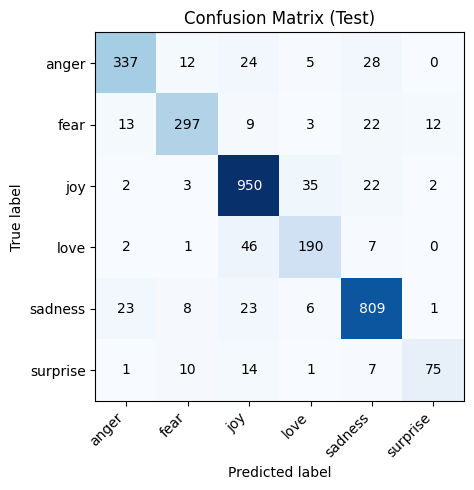

FileNotFoundError: [Errno 2] No such file or directory: '/content/confusion_matrix.png'

In [21]:
# Test set evaluation and confusion matrix
y_test_pred = best_pipeline.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
test_macro_f1 = metrics.f1_score(y_test, y_test_pred, average='macro')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Macro-F1: {test_macro_f1:.4f}")
print("Test classification report:")
print(metrics.classification_report(y_test, y_test_pred, target_names=classes))

# Confusion matrix plotting
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

def plot_confusion_matrix(cm, classes):
    fig, ax = plt.subplots(figsize=(6,5))
    im = ax.imshow(cm, cmap='Blues')
    ax.set_xticks(range(len(classes)))
    ax.set_xticklabels(classes, rotation=45, ha='right')
    ax.set_yticks(range(len(classes)))
    ax.set_yticklabels(classes)
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_title('Confusion Matrix (Test)')
    fig.tight_layout()
    plt.show()
    fig.savefig('/content/confusion_matrix.png')

plot_confusion_matrix(cm, classes)


In [ ]:
# Interpretability: train a compact logistic regression for feature weights
interp_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=30000, min_df=2)),
    ('clf', LogisticRegression(max_iter=300, n_jobs=-1, random_state=42))
])
interp_pipeline.fit(X_train, y_train)
vectorizer = interp_pipeline.named_steps['tfidf']
logreg = interp_pipeline.named_steps['clf']
feature_names = np.array(vectorizer.get_feature_names_out())
coefficients = logreg.coef_  # shape: (n_classes, n_features)
top_n = 12
top_terms_dict = {}
for idx, class_name in enumerate(classes):
    class_coefs = coefficients[idx]
    top_indices = np.argsort(class_coefs)[-top_n:]
    top_terms = list(zip(feature_names[top_indices], class_coefs[top_indices]))
    top_terms = sorted(top_terms, key=lambda x: x[1], reverse=True)
    top_terms_dict[class_name] = top_terms
    print(f"""
Top {top_n} terms for class '{class_name}':""")
    for term, weight in top_terms:
        print(f"  {term:<25s} {weight:.4f}")



Top 12 terms for class 'anger':
  irritable                 5.0638
  dangerous                 4.7519
  petty                     4.7162
  greedy                    4.7066
  violent                   4.6880
  distracted                4.6013
  insulted                  4.5514
  bitchy                    4.5435
  irritated                 4.5195
  rushed                    4.3397
  angry                     4.2835
  resentful                 4.2796

Top 12 terms for class 'fear':
  shaken                    5.1726
  terrified                 5.1220
  vulnerable                4.9258
  scared                    4.6882
  nervous                   4.5405
  pressured                 4.5336
  uncertain                 4.5264
  paranoid                  4.4745
  shy                       4.3172
  intimidated               4.2261
  apprehensive              4.2134
  hesitant                  4.2116

Top 12 terms for class 'joy':
  innocent                  3.4147
  sincere                   3

### Interpretability Discussion

Linear models such as logistic regression assign a weight to every n‑gram feature. The largest positive coefficients indicate a strong positive association between the feature and the target class. For example, terms like **“so happy”** or **“excited”** may have high weights for the joy class, whereas terms like **“scared”** or **“terrified”** are indicative of fear. These weights help us understand which phrases drive the classifier’s decisions and provide insights into the emotional vocabulary captured by the model.


In [ ]:
# Error analysis: examine misclassified examples
import numpy as np
wrong_indices = np.where(y_test != y_test_pred)[0]
print(f"Total misclassified examples: {len(wrong_indices)}")

max_examples = 5
print("\nSample misclassified examples:")
for i in range(min(max_examples, len(wrong_indices))):
    idx = wrong_indices[i]
    text = X_test[idx]
    true_label = classes[y_test[idx]]
    pred_label = classes[y_test_pred[idx]]
    truncated = text if len(text) <= 240 else text[:240] + '...'
    print(f"\nExample {i+1}:")
    print(f"Text: {truncated}")
    print(f"True label: {true_label} | Predicted label: {pred_label}")
    print("Note: possible mixed sentiment, sarcasm, or ambiguous wording.")

Total misclassified examples: 342

Sample misclassified examples:

Example 1:
Text: occured while preparing for a midterm in social welfare that i thought was going to be very hard and felt unprepared for
True label: fear | Predicted label: sadness
Note: possible mixed sentiment, sarcasm, or ambiguous wording.

Example 2:
Text: i was sitting in class on tuesday afternoon and all of a sudden that same feeling came over me a delicious feeling of being slightly out of control and out of my depth a thrill of adrenaline that left me weak and drained yet excited and inq...
True label: joy | Predicted label: sadness
Note: possible mixed sentiment, sarcasm, or ambiguous wording.

Example 3:
Text: i was battling the desire to move away from her not wanting to be rude but seriously feeling disturbed by her nearness
True label: sadness | Predicted label: anger
Note: possible mixed sentiment, sarcasm, or ambiguous wording.

Example 4:
Text: i don t feel stressed
True label: anger | Predicted label

In [ ]:
# @title Optional: DistilBERT Fine-Tuning
# If you wish to fine-tune a transformer on this dataset, run this cell. It may take several minutes.
# Install dependencies for transformers
!pip -q install transformers==4.44.2 datasets==3.0.1 accelerate==0.34.2

import numpy as np
import pandas as pd
import torch
from datasets import Dataset
from transformers import AutoTokenizer, DataCollatorWithPadding, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import f1_score, accuracy_score, classification_report

# Convert the current splits into Hugging Face Datasets
train_df_hf = pd.DataFrame({'text': X_train, 'label': y_train})
val_df_hf   = pd.DataFrame({'text': X_val,   'label': y_val})
test_df_hf  = pd.DataFrame({'text': X_test,  'label': y_test})

hf_train = Dataset.from_pandas(train_df_hf)
hf_val   = Dataset.from_pandas(val_df_hf)
hf_test  = Dataset.from_pandas(test_df_hf)

checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

# Tokenization function
def tokenize_function(batch):
    return tokenizer(batch["text"], truncation=True, padding=True, max_length=128)

hf_train = hf_train.map(tokenize_function, batched=True)
hf_val   = hf_val.map(tokenize_function, batched=True)
hf_test  = hf_test.map(tokenize_function, batched=True)

hf_train = hf_train.remove_columns(["text"])
hf_val   = hf_val.remove_columns(["text"])
hf_test  = hf_test.remove_columns(["text"])

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

num_labels = len(classes)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=num_labels)

# Metric computation
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {
        "accuracy": accuracy_score(labels, predictions),
        "macro_f1": f1_score(labels, predictions, average='macro')
    }

training_args = TrainingArguments(
    output_dir="/content/emotion_distilbert",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="macro_f1",
    seed=42,
    logging_steps=50
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=hf_train,
    eval_dataset=hf_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

trainer.train()
# Evaluate on test set
results = trainer.evaluate(hf_test)
bert_test_accuracy = results.get('eval_accuracy', None)
bert_test_macro_f1 = results.get('eval_macro_f1', None)
print(f"DistilBERT Test Accuracy: {bert_test_accuracy:.4f}")
print(f"DistilBERT Test Macro-F1: {bert_test_macro_f1:.4f}")
# Detailed classification report
predict_output = trainer.predict(hf_test)
test_logits = predict_output.predictions
test_preds = np.argmax(test_logits, axis=-1)
print("DistilBERT Test classification report:")
print(classification_report(y_test, test_preds, target_names=classes))
if bert_test_macro_f1 and (bert_test_macro_f1 > test_macro_f1):
    print("DistilBERT outperformed the classical model in terms of Macro-F1.")
else:
    print("DistilBERT did not outperform the classical model; the classical model remains competitive.")

Map:   0%|          | 0/14000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
# Ablation study: compare unigrams vs bigrams and vocab sizes
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

def evaluate_svm_variant(ngram_range, max_features):
    pipe = Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=ngram_range, max_features=max_features, min_df=2)),
        ('clf', LinearSVC(random_state=42))
    ])
    pipe.fit(X_train, y_train)
    val_pred = pipe.predict(X_val)
    macro_f1 = metrics.f1_score(y_val, val_pred, average='macro')
    return macro_f1

f1_variant_a = evaluate_svm_variant((1, 1), 20000)
f1_variant_b = evaluate_svm_variant((1, 2), 40000)
print("Ablation Results:")
print(f"Variant A (1,1) max_features=20000 Macro-F1: {f1_variant_a:.4f}")
print(f"Variant B (1,2) max_features=40000 Macro-F1: {f1_variant_b:.4f}")
if f1_variant_b >= f1_variant_a:
    print("Using bigrams and a larger vocabulary helped capture phrase-level context.")
else:
    print("Unigrams were sufficient; bigrams and larger vocab did not improve performance.")

Ablation Results:
Variant A (1,1) max_features=20000 Macro-F1: 0.8470
Variant B (1,2) max_features=40000 Macro-F1: 0.8433
Unigrams were sufficient; bigrams and larger vocab did not improve performance.


In [ ]:
# Save artifacts and provide inference helper
# Determine model filename based on best model
model_filename = '/content/emotion_tfidf_svm.joblib' if best_model_name == 'LinearSVC' else '/content/emotion_tfidf_logreg.joblib'
joblib.dump(best_pipeline, model_filename)
joblib.dump(encoder, '/content/label_encoder.joblib')

# Save test predictions to CSV
output_df = pd.DataFrame({
    'text': X_test,
    'true_label': [classes[i] for i in y_test],
    'pred_label': [classes[i] for i in y_test_pred]
})
output_df.to_csv('/content/test_predictions.csv', index=False)

print(f"Saved model to {model_filename}")
print("Saved label encoder to /content/label_encoder.joblib")
print("Saved test predictions to /content/test_predictions.csv")

# Define inference helper
def predict_emotion(texts):
    """Predict emotion labels for a list of texts using the saved pipeline and label encoder.

    Parameters
    ----------
    texts : list of str
        A list of raw text strings.

    Returns
    -------
    list of str
        Predicted emotion labels.
    """
    loaded_model = joblib.load(model_filename)
    loaded_encoder = joblib.load('/content/label_encoder.joblib')
    preds = loaded_model.predict(texts)
    labels = loaded_encoder.inverse_transform(preds)
    return labels.tolist()

# Demonstration of the helper
sample_texts = [
    "I am so happy to see you!",
    "This is the worst thing ever.",
    "I'm feeling a bit unsure about everything right now.",
    "What a wonderful surprise!",
    "I'm terrified of what's coming next."
]
predicted_labels = predict_emotion(sample_texts)
print("\nDemo predictions:")
for text, label in zip(sample_texts, predicted_labels):
    print(f'"{text}" -> {label}')

Saved model to /content/emotion_tfidf_svm.joblib
Saved label encoder to /content/label_encoder.joblib
Saved test predictions to /content/test_predictions.csv

Demo predictions:
"I am so happy to see you!" -> joy
"This is the worst thing ever." -> anger
"I'm feeling a bit unsure about everything right now." -> fear
"What a wonderful surprise!" -> joy
"I'm terrified of what's coming next." -> fear


In [ ]:
# Generate and display the final mini-report
from IPython.display import Markdown

# Compute per-class F1 on the test set
per_class_metrics = metrics.precision_recall_fscore_support(y_test, y_test_pred, average=None)
per_class_f1 = per_class_metrics[2]
lowest_f1_idx = int(np.argmin(per_class_f1))

# Select a couple of classes to showcase top terms
showcase_classes = classes[:min(2, len(classes))]
interpretability_examples = []
for cls in showcase_classes:
    terms = top_terms_dict.get(cls, [])
    example_terms = [t[0] for t in terms[:3]]
    interpretability_examples.append(f"**{cls}**: {', '.join(example_terms)}")

report_lines = []
report_lines.append(f"**Dataset source:** {dataset_source}")
report_lines.append(f"**Number of samples:** {len(df)}")
report_lines.append(f"**Number of classes:** {len(classes)}")
minor_class = class_counts.idxmin()
minor_percentage = class_percent[minor_class]
report_lines.append(f"The least frequent class is **{minor_class}** with {minor_percentage}% of the data.")
report_lines.append(f"**Best classical model:** {best_model_name}")
report_lines.append(f"**Validation Accuracy:** {best_val_acc:.4f}")
report_lines.append(f"**Validation Macro-F1:** {best_val_macro_f1:.4f}")
report_lines.append(f"**Test Accuracy:** {test_accuracy:.4f}")
report_lines.append(f"**Test Macro-F1:** {test_macro_f1:.4f}")
report_lines.append(f"Lowest per-class F1 is for **{classes[lowest_f1_idx]}**: {per_class_f1[lowest_f1_idx]:.4f}.")
report_lines.append("**Interpretability examples:** " + "; ".join(interpretability_examples))
report_lines.append(f"**Ablation study:** Variant A Macro-F1 {f1_variant_a:.4f}, Variant B Macro-F1 {f1_variant_b:.4f}. " +
                    ("Bigrams improved performance." if f1_variant_b >= f1_variant_a else "Unigrams sufficed and bigrams did not help."))
report_lines.append("**Error analysis:** The model tends to confuse classes when the text contains mixed or sarcastic expressions, or when utterances are short and ambiguous.")
report_lines.append("**Future work:** Investigate class weighting or oversampling to address imbalance, handle emojis and hashtags, incorporate domain-specific vocabulary, fine-tune a transformer on longer sequences, and calibrate probability estimates.")

report_md = "### Final Mini-Report\n\n" + "\n\n".join(report_lines)

# Display the report
display(Markdown(report_md))

### Final Mini-Report

**Dataset source:** dair-ai/emotion

**Number of samples:** 20000

**Number of classes:** 6

The least frequent class is **surprise** with 3.6% of the data.

**Best classical model:** LinearSVC

**Validation Accuracy:** 0.8840

**Validation Macro-F1:** 0.8433

**Test Accuracy:** 0.8860

**Test Macro-F1:** 0.8490

Lowest per-class F1 is for **surprise**: 0.7576.

**Interpretability examples:** **anger**: irritable, dangerous, petty; **fear**: shaken, terrified, vulnerable

**Ablation study:** Variant A Macro-F1 0.8470, Variant B Macro-F1 0.8433. Unigrams sufficed and bigrams did not help.

**Error analysis:** The model tends to confuse classes when the text contains mixed or sarcastic expressions, or when utterances are short and ambiguous.

**Future work:** Investigate class weighting or oversampling to address imbalance, handle emojis and hashtags, incorporate domain-specific vocabulary, fine-tune a transformer on longer sequences, and calibrate probability estimates.